In [2]:
!pip install scikit-learn

In [168]:
import numpy as np
import pandas as pd
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [85]:
from sklearn.datasets import load_breast_cancer

In [106]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
df['diagnosis'] = breast_cancer.target 
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [67]:
df.shape

(569, 31)

In [69]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')

In [75]:
df["diagnosis"].unique()

array([0, 1])

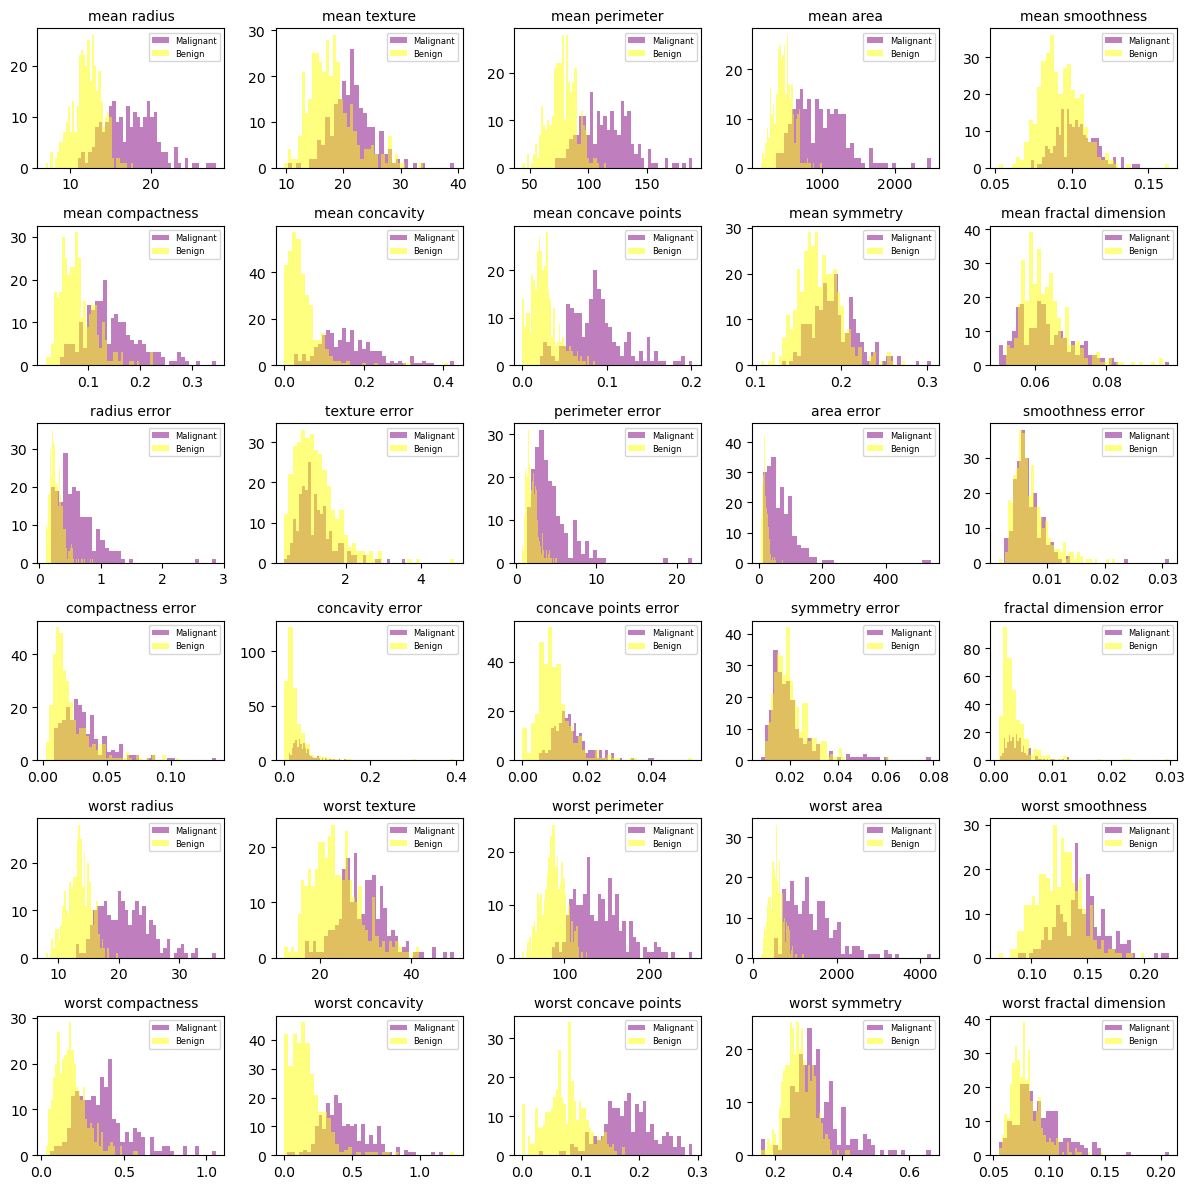

In [104]:
import matplotlib.pyplot as plt

malignant = df[df['diagnosis'] == 0]
benign = df[df['diagnosis'] == 1]

fig, axes = plt.subplots(6, 5, figsize=(12, 12))
ax = axes.ravel()

for i in range(30):
    feature = breast_cancer.feature_names[i]
    ax[i].hist(malignant[feature], bins=40, color='purple', alpha=0.5, label="Malignant")
    ax[i].hist(benign[feature], bins=40, color='yellow', alpha=0.5, label="Benign")
    ax[i].set_title(feature, fontsize=10)
    ax[i].legend(fontsize=6)

plt.tight_layout()
plt.show()

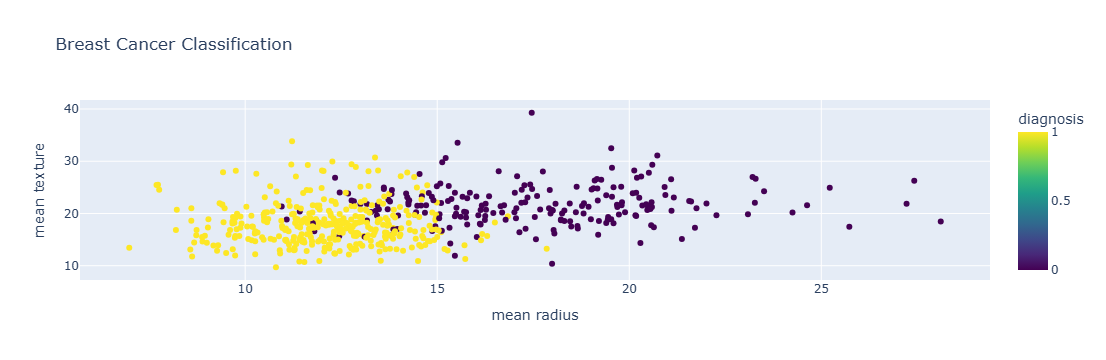

In [114]:
fig = px.scatter(df, x="mean radius", y="mean texture", color=df["diagnosis"],
                 title="Breast Cancer Classification", labels={"color": "diagnosis"},
                 color_continuous_scale="viridis")
fig.show()

In [116]:
X = df[['mean radius','mean texture']]
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


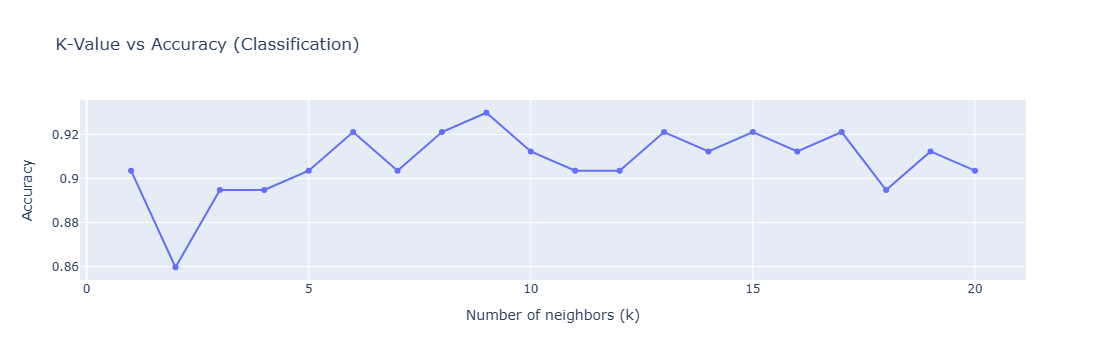

In [214]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

fig = px.line(x=k_values, y=accuracies, markers=True, title="K-Value vs Accuracy (Classification)",
              labels={"x": "Number of neighbors (k)", "y": "Accuracy"})
fig.show()

In [153]:
best_k = k_values[np.argmax(accuracies)]
best_k

9

In [154]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [158]:
y_pred = knn_final.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9298


In [160]:
report = classification_report(y_test, y_pred, target_names=data.target_names)
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

   malignant       0.91      0.91      0.91        43
      benign       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [162]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index=data.target_names, columns=data.target_names)
cm_df

,malignant,benign
malignant,39,4
benign,4,67


In [174]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
k_value = range(1-21)
mae_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mae_scores.append(mae)

In [176]:
best_k = k_values[np.argmin(mae_scores)]
best_k

1

In [178]:
best_k = k_values[np.argmin(mae_scores)]
knn_final_reg = KNeighborsRegressor(n_neighbors=best_k)
knn_final_reg.fit(X_train, y_train)

# Predict & Regression Line Visualization
y_pred_final = knn_final_reg.predict(X_test)

In [206]:
mse = mean_squared_error(y_test, y_pred_final)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_final)
r2 = r2_score(y_test, y_pred_final)

print(f"\n Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-Squared (R² Score): {r2:.4f}")



 Regression Evaluation Metrics:
Mean Squared Error (MSE): 0.0965
Root Mean Squared Error (RMSE): 0.3106
Mean Absolute Error (MAE): 0.0965
R-Squared (R² Score): 0.5893


### Logistic Regression

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]  
y = df.iloc[:, -1]    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12, shuffle=True)

log_reg = LogisticRegression(max_iter=100)  
log_reg.fit(X_train, y_train)

accuracy = log_reg.score(X_test, y_test)
print(f"Logistic Regression Accuracy (All Features): {accuracy:.4f}")


Logistic Regression Accuracy (All Features): 0.9415


C:\Users\RITIKA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [231]:
df_corr = df.corr()['diagnosis'].abs().sort_values(ascending=False)
df_corr

diagnosis                  1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

In [233]:
important_features = df_corr[df_corr > 0.6].index.to_list()[1:] 
print("Highly Correlated Features:\n", important_features)


Highly Correlated Features:
 ['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'mean perimeter', 'worst area', 'mean radius', 'mean area', 'mean concavity', 'worst concavity']


In [235]:
X_reduced = df[important_features]
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=12, shuffle=True)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

accuracy_reduced = log_reg.score(X_test, y_test)
print(f"Logistic Regression Accuracy (Reduced Features): {accuracy_reduced:.4f}")


Logistic Regression Accuracy (Reduced Features): 0.9181


C:\Users\RITIKA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

